In [24]:
import folium
import pandas as pd
import numpy as np
import re

In [25]:
df = pd.read_json("/content/real-estate-scrapper-2ac0c-default-rtdb-Consolao, So Paulo-export.json")
df.head()

,banheiros,distance,endereço,lat,link,lon,preço,quartos,site,texto,área,vagas,valor_de_condominio
0,1,32.672785,"01309-030, Consolação, São Paulo, Estado de Sã...",-23.554068,https://rd.clk.thribee.com/id.1d1C1NQad1vA/ori...,-46.657645,2500,1,trovit,"Apto, Consolação, 1 Quarto, 42 m2 - São Paulo\...",42,NaN,NaN
1,1,32.666171,"01306-010, Consolação, São Paulo, Estado de Sã...",-23.554817,https://rd.clk.thribee.com/id.1iP161L461cD/ori...,-46.649040,2400,1,trovit,"Apto, Consolação, 1 Quarto, 50 m2 - São Paulo\...",50,NaN,NaN
2,1,32.666679,"01306-001, Consolação, São Paulo, Estado de Sã...",-23.550563,https://rd.clk.thribee.com/id.1JM1C1q-ZL17/ori...,-46.645503,930,1,trovit,"Apto, Consolação, 1 Quarto, 17 m2 - São Paulo\...",17,NaN,NaN
3,1,32.669379,"01301-000, Consolação, São Paulo, Estado de Sã...",-23.547308,https://rd.clk.thribee.com/id.1M_g3P1S1fK/orig...,-46.646067,2800,1,trovit,"Apto, Consolação, 1 Quarto, 34 m2 - São Paulo\...",34,NaN,NaN
4,1,32.669750,"01303-001, Consolação, São Paulo, Estado de Sã...",-23.549255,https://rd.clk.thribee.com/id.1kIJ1Su1E1xA/ori...,-46.648539,1600,1,trovit,"Apto, Consolação, 1 Quarto, 49 m2 - São Paulo\...",49,NaN,NaN


In [26]:
# Analisando onde não conseguimos extrair a latitude
# df.loc[df.lat.isnull()]

In [27]:
# Removendo anúncios que não tem coordenadas
df = df.loc[df.lat.notna()]
# Substituindo alguns NaNs secundários por 0s
df.vagas.fillna(0, inplace=True)
df.quartos.fillna(0, inplace=True)
df["área"].fillna(0, inplace=True)
# Corrigindo tipo coluna Vagas
df["vagas"] = df["vagas"].astype(int)

In [32]:
first_sixth = np.quantile(df.preço, 1/6)
last_sixth = np.quantile(df.preço, 5/6)

# Criando nosso mapa
m = folium.Map(location=[-23.537034, -46.674346], zoom_start=13)

for lat,lon,address,preco,n_quartos,n_banheiros,n_vagas,area in zip(df.lat, df.lon, df["endereço"], df['preço'], df['quartos'], df['banheiros'], df['vagas'], df['área']):
  html = f'''Aluguel: R$ {preco},00<br>
            Endereço: {address}
            Quartos: {n_quartos}<br>
            Banheiros: {n_banheiros}<br>
            Vagas: {n_vagas}<br>
            Área: {area} m²'''
  iframe = folium.IFrame(html,
                       width=160,
                       height=125)
  popup = folium.Popup(iframe)
  if preco <= first_sixth:
    color="green"
  elif preco < last_sixth:
    color="orange"
  else:
    color="red"
  folium.Marker(
    location=[lat, lon],
    popup=popup,
    icon=folium.Icon(icon="building", prefix="fa", color=color),
    ).add_to(m)

In [33]:
m

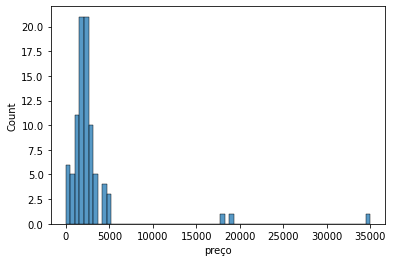

In [30]:
import seaborn as sns
sns.histplot(df.preço)

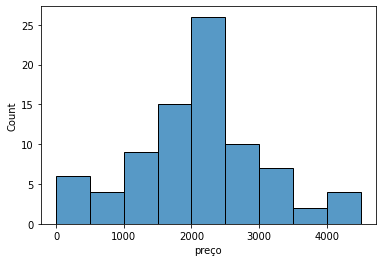

In [31]:
import seaborn as sns
sns.histplot(df[df.preço < np.quantile(df.preço, 0.95)].preço, binwidth=500)